In [1]:
# ---Análisis de Datos---

In [2]:
import pandas as pd

In [ ]:
# Cargando al dataset
data = pd.read_csv("mission_launches.csv")

In [ ]:
# Verificando si hay valores nulos
null_counts = data.isnull().sum()

# Mostrando los valores nulos
print(null_counts[null_counts > 0])

# Eliminando valores nulos
data = data.dropna()

Price    3360
dtype: int64


In [8]:
# Comprobando que se hayan eliminado todos los valores nulos
print(data.isnull().sum())

Unnamed: 0.1      0
Unnamed: 0        0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64


In [9]:
# Verificando que tipo de dato es "Date"
print(data['Date'].dtype)

object


In [10]:
# Mostrando los nombres de las columnas
print(data.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [54]:
# Asegúrate de que la columna de fechas esté en formato datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Crear una nueva columna con el año
data['Year'] = data['Date'].dt.year

In [23]:
# Mostrando los valores de la columna "Year"
print(data['Year'].head())

0      2020.0
1      2020.0
3      2020.0
4      2020.0
5      2020.0
        ...  
128    2019.0
129    2019.0
130    2019.0
131    2019.0
132    2019.0
Name: Year, Length: 100, dtype: float64


In [27]:
# Filtrar las misiones de 2020 (puedes cambiar el año según tu necesidad)
year_data = data[data['Year'] == 2017]

# Agrupar por organización y contar
launches_per_org = year_data.groupby('Organisation')['Organisation'].count()

# Ordenar por número de lanzamientos
launches_per_org = launches_per_org.sort_values(ascending=False)

# Mostrar el top 1
print(launches_per_org.head(1))

Organisation
SpaceX    18
Name: Organisation, dtype: int64


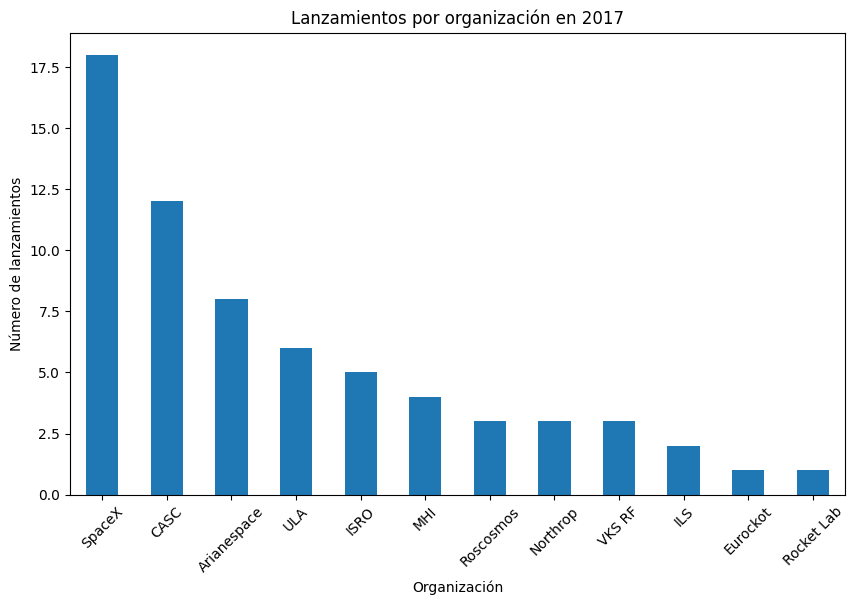

In [31]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
launches_per_org.plot(kind='bar', figsize=(10, 6))
plt.title(f'Lanzamientos por organización en 2017')
plt.xlabel('Organización')
plt.ylabel('Número de lanzamientos')
plt.xticks(rotation=45)
plt.show()


In [32]:
# Verificando que la columna "Price" sea numerica
print(data["Price"].dtype)

object


In [33]:
# Convirtiendo a numerico
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

In [ ]:
# Filtrar filas con valores nulos en 'Cost' o 'Year'
data = data.dropna(subset=['Price', 'Year'])

# Excluyendo valores atípicos
data = data[data['Price'] > 0]

In [38]:
# Agrupando por año y calcular el costo promedio
cost_per_year = data.groupby('Year')['Price'].mean()

# Mostrando los resultados
print(cost_per_year)

Year
1964.0     63.230000
1965.0     63.230000
1966.0     59.000000
1967.0     59.000000
1968.0     59.000000
1969.0     59.000000
1981.0    450.000000
1982.0    345.200000
1983.0    366.160000
1984.0    380.133333
1985.0    408.080000
1986.0    310.266667
1987.0     30.800000
1988.0    241.450000
1989.0    380.833333
1990.0    289.145455
1991.0    391.428571
1992.0    319.345833
1993.0    276.733333
1994.0    221.509375
1995.0    325.000000
1996.0    243.196429
1997.0    221.738889
1998.0    152.122222
1999.0    136.166154
2000.0    173.118750
2001.0    290.700000
2002.0    195.372500
2003.0     80.511500
2004.0     92.735882
2005.0     95.793333
2006.0    138.605926
2007.0    125.695172
2008.0    129.748214
2009.0    180.287097
2010.0    148.400000
2011.0    146.596552
2012.0    126.095833
2013.0     90.551515
2014.0    102.551220
2015.0     95.948649
2016.0     79.457344
2017.0     69.491061
2018.0     64.749773
2019.0     59.609726
2020.0     56.650192
Name: Price, dtype: float64


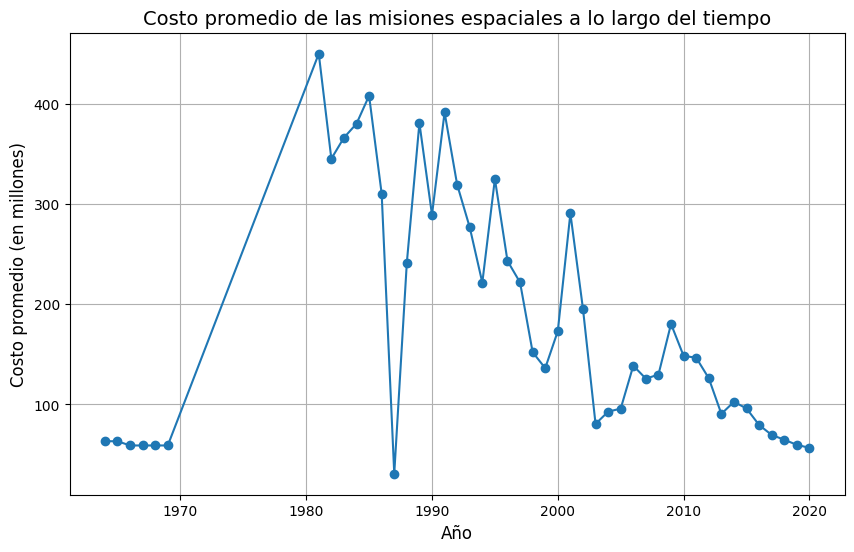

In [42]:
import matplotlib.pyplot as plt

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(cost_per_year.index, cost_per_year.values, marker='o')
plt.title('Costo promedio de las misiones espaciales a lo largo del tiempo', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Costo promedio (en millones)', fontsize=12)
plt.grid(True)
plt.show()

In [43]:
# Creando una nueva columna con el mes del lanzamiento
data['Month'] = data['Date'].dt.month

In [44]:
# Contar el número de lanzamientos por mes
launches_per_month = data['Month'].value_counts().sort_index()

# Mostrar los resultados
print(launches_per_month)

Month
1     65
2     60
3     76
4     85
5     83
6     85
7     75
8     82
9     87
10    83
11    73
12    89
Name: count, dtype: int64


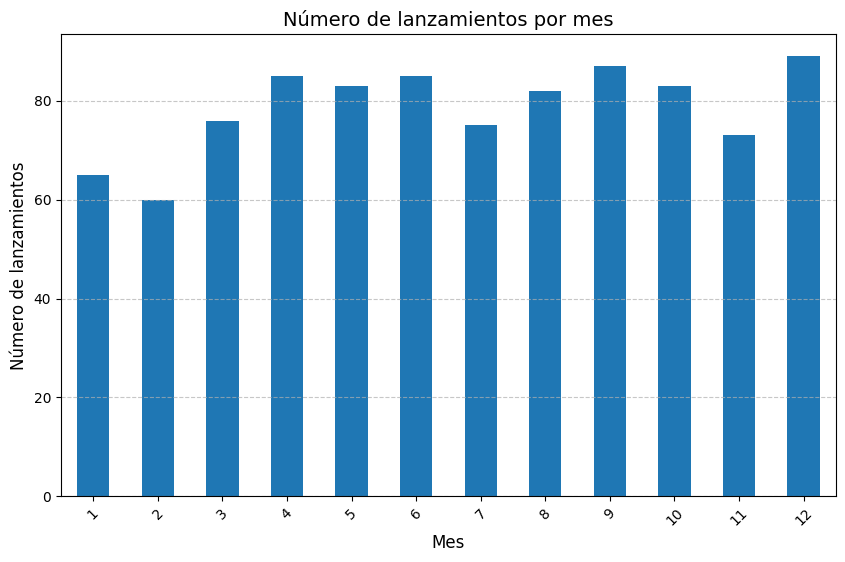

In [47]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
launches_per_month.plot(kind='bar')
plt.title('Número de lanzamientos por mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de lanzamientos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [48]:
# Clasificando los estados en dos categorías: Éxito y Fracaso
def classify_status(status):
    if 'Success' in status:
        return 'Success'
    else:
        return 'Failure'

# Aplicando la clasificación
data['Simplified_Status'] = data['Mission_Status'].apply(classify_status)

In [ ]:
# Agrupando por año y calcular la cantidad de éxitos y fracasos
mission_summary = data.groupby('Year')['Simplified_Status'].value_counts().unstack()

# Calculando la tasa de éxito
mission_summary['Success_Rate'] = (mission_summary['Success'] / mission_summary.sum(axis=1)) * 100

# Mostrando los resultados
print(round(mission_summary))

Simplified_Status  Failure  Success  Success_Rate
Year                                             
1964.0                 1.0      1.0          50.0
1965.0                 NaN      2.0         100.0
1966.0                 NaN      3.0         100.0
1967.0                 1.0      5.0          83.0
1968.0                 NaN      8.0         100.0
1969.0                 NaN      4.0         100.0
1981.0                 NaN      2.0         100.0
1982.0                 NaN      4.0         100.0
1983.0                 NaN      5.0         100.0
1984.0                 NaN      6.0         100.0
1985.0                 NaN     10.0         100.0
1986.0                 1.0      2.0          67.0
1987.0                 NaN      2.0         100.0
1988.0                 NaN      4.0         100.0
1989.0                 NaN      6.0         100.0
1990.0                 1.0     10.0          91.0
1991.0                 1.0      6.0          86.0
1992.0                 NaN     12.0         100.0


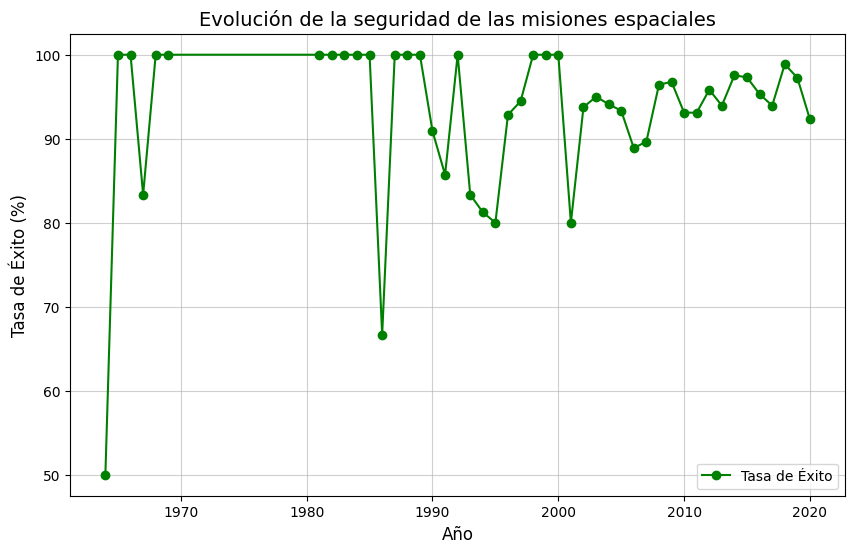

In [53]:
import matplotlib.pyplot as plt

# Crear un gráfico de líneas para la tasa de éxito
plt.figure(figsize=(10, 6))
plt.plot(mission_summary.index, mission_summary['Success_Rate'], marker='o', color='green', label='Tasa de Éxito')
plt.title('Evolución de la seguridad de las misiones espaciales', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Tasa de Éxito (%)', fontsize=12)
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()